<a href="https://colab.research.google.com/github/smartinternz02/SI-GuidedProject-580786-1694703095/blob/main/asgn3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

In [7]:
df=pd.read_csv("/content/Titanic-Dataset.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [8]:
df.shape

(891, 12)

#Check for null values

In [9]:
df.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [10]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#Data Visualization

Uni-variate

<Axes: >

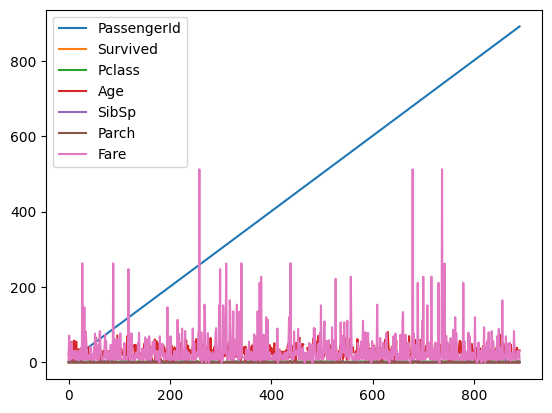

In [11]:
df.plot()

<Axes: >

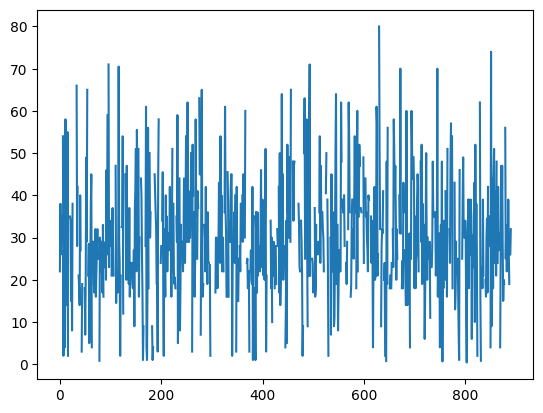

In [12]:
df['Age'].plot()

<ipython-input-13-70b4b4beb1b5>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Fare'])


<Axes: xlabel='Fare', ylabel='Density'>

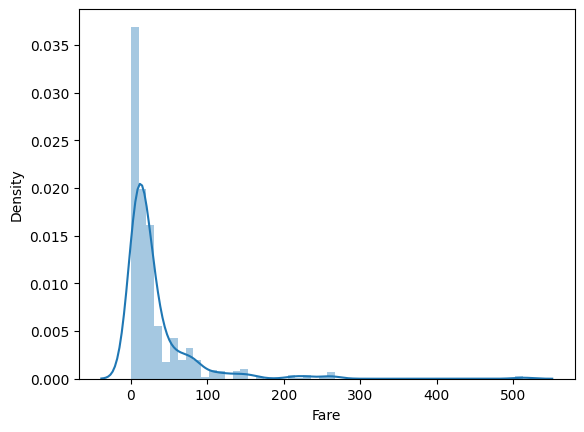

In [13]:
sns.distplot(df['Fare'])

Bi-variate Analysis

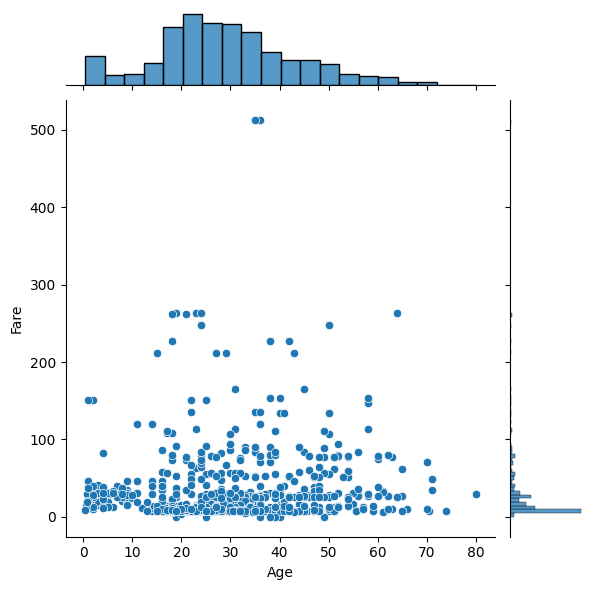

In [14]:
sns.jointplot(x='Age', y='Fare', data=df)

Multi-variate Analysis

In [15]:
sns.pairplot

<function seaborn.axisgrid.pairplot(data, *, hue=None, hue_order=None, palette=None, vars=None, x_vars=None, y_vars=None, kind='scatter', diag_kind='auto', markers=None, height=2.5, aspect=1, corner=False, dropna=False, plot_kws=None, diag_kws=None, grid_kws=None, size=None)>

In [16]:
df.corr()

<ipython-input-16-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


<ipython-input-17-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

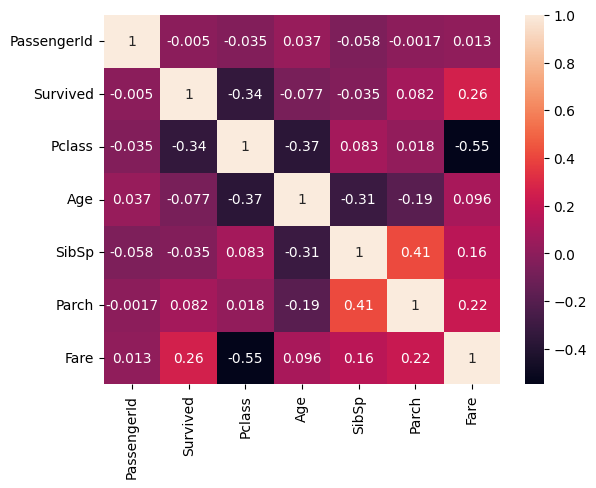

In [17]:
sns.heatmap(df.corr(),annot=True)

In [18]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#Outlier Detection

In [19]:
print("Highest allowed",(df['Fare'].mean()) + (3*df['Fare'].std()))
print("Lowest allowed",(df['Fare'].mean()) - (3*df['Fare'].std()))

Highest allowed 181.2844937601173
Lowest allowed -116.87607782296804


In [20]:
df[(df['Fare']>243.1)|df['Fare']<158.73]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [21]:
median = df.loc[df['Fare']<200, 'Fare'].median()
df.loc[df['Fare'] > 200, 'Fare'] = np.nan
df.fillna(median,inplace=True)
median

13.8625

#Splitting Dependent and Independent Variables

In [22]:
# Independent variables (features)
X = df.drop('Fare', axis=1)
X

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0000,1,0,A/5 21171,13.8625,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0000,1,0,PC 17599,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0000,0,0,STON/O2. 3101282,13.8625,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0000,1,0,113803,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0000,0,0,373450,13.8625,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0000,0,0,211536,13.8625,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0000,0,0,112053,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,13.8625,1,2,W./C. 6607,13.8625,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0000,0,0,111369,C148,C


In [23]:
# Dependent variable (target)
y = df['Fare']
y

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: Fare, Length: 891, dtype: float64

#Encoding

One-Hot Encoding

In [24]:
de = pd.get_dummies(df, columns=['Fare'])
print(de.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket    Cabin  ... Fare_110.8833  Fare_113.275  \
0      0         A/5 21171  13.8625  ...             0             0   
1      0          PC 17599      C85  ...             0             0   
2      0  STON/O2. 3101282  13.8625  ...             0             0   
3      0            113803     C

Label Encoding

In [25]:
le = LabelEncoder()
df['encoded_column'] = le.fit_transform(df['Fare'])
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare    Cabin Embarked  encoded_column  
0      0         A/5 21171   7.2500  13.8625        S              18  
1      0          PC 17599  71.2833      C85        C             207  
2      0  STON/O2. 3101282   7.9250  13.8625        S              41  
3      0            113803  53.1

#Scaling

In [26]:
X = df[['Fare', 'Age']]

Min-Max Scaling

In [28]:
scaler_minmax = MinMaxScaler()
X_minmax = scaler_minmax.fit_transform(X)
X_minmax

array([[0.04397492, 0.27117366],
       [0.4323693 , 0.4722292 ],
       [0.04806914, 0.32143755],
       ...,
       [0.14223612, 0.16891807],
       [0.18196519, 0.32143755],
       [0.04700767, 0.39683338]])

Z-score Scaling

In [29]:
scaler_standard = StandardScaler()
X_standard = scaler_standard.fit_transform(X)
X_standard

array([[-0.65358888, -0.31510648],
       [ 1.5496035 ,  0.79220026],
       [-0.63036417, -0.03827979],
       ...,
       [-0.09619583, -0.87827577],
       [ 0.12916988, -0.03827979],
       [-0.63638539,  0.37696023]])

#Splitting data into Training and Testing

In [33]:
X = df.drop('Fare', axis=1)
y = df['Fare']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=65)

In [34]:
X_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Cabin,Embarked,encoded_column
82,83,1,3,"McDermott, Miss. Brigdet Delia",female,13.8625,0,0,330932,13.8625,Q,32
507,508,1,1,"Bradley, Mr. George (""George Arthur Brayton"")",male,13.8625,0,0,111427,13.8625,S,143
815,816,0,1,"Fry, Mr. Richard",male,13.8625,0,0,112058,B102,S,0
479,480,1,3,"Hirvonen, Miss. Hildur E",female,2.0000,0,1,3101298,13.8625,S,79
471,472,0,3,"Cacic, Mr. Luka",male,38.0000,0,0,315089,13.8625,S,54
...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,0,3,"Oreskovic, Mr. Luka",male,20.0000,0,0,315094,13.8625,S,54
296,297,0,3,"Hanna, Mr. Mansour",male,23.5000,0,0,2693,13.8625,C,17
575,576,0,3,"Patchett, Mr. George",male,19.0000,0,0,358585,13.8625,S,96
117,118,0,2,"Turpin, Mr. William John Robert",male,29.0000,1,0,11668,13.8625,S,123


In [35]:
X_test

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Cabin,Embarked,encoded_column
828,829,1,3,"McCormack, Mr. Thomas Joseph",male,13.8625,0,0,367228,13.8625,Q,30
396,397,0,3,"Olsson, Miss. Elina",female,31.0000,0,0,350407,13.8625,S,36
222,223,0,3,"Green, Mr. George Henry",male,51.0000,0,0,21440,13.8625,S,43
278,279,0,3,"Rice, Master. Eric",male,7.0000,4,1,382652,13.8625,Q,151
688,689,0,3,"Fischer, Mr. Eberhard Thelander",male,18.0000,0,0,350036,13.8625,S,33
...,...,...,...,...,...,...,...,...,...,...,...,...
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0000,0,1,11767,C50,C,221
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,13.8625,1,2,W./C. 6607,13.8625,S,131
273,274,0,1,"Natsch, Mr. Charles H",male,37.0000,0,1,PC 17596,C118,C,152
205,206,0,3,"Strom, Miss. Telma Matilda",female,2.0000,0,1,347054,G6,S,71


In [36]:
y_train

82      7.7875
507    26.5500
815     0.0000
479    12.2875
471     8.6625
        ...   
725     8.6625
296     7.2292
575    14.5000
117    21.0000
814     8.0500
Name: Fare, Length: 445, dtype: float64

In [37]:
y_test

828     7.7500
396     7.8542
222     8.0500
278    29.1250
688     7.7958
        ...   
879    83.1583
888    23.4500
273    29.7000
205    10.4625
280     7.7500
Name: Fare, Length: 446, dtype: float64